<a href="https://colab.research.google.com/github/phuri7987/229352-StatisticalLearning-Lab/blob/main/Lab06_SVM_640510703.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

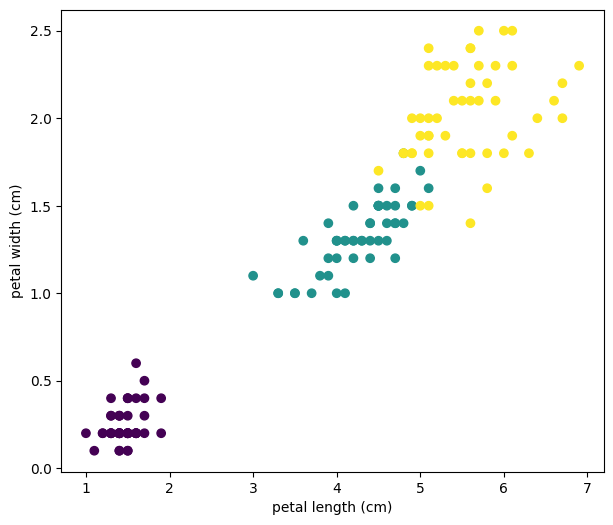

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [5]:
#TODO
X_train,X_test,y_train,y_test = train_test_split(X,y)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

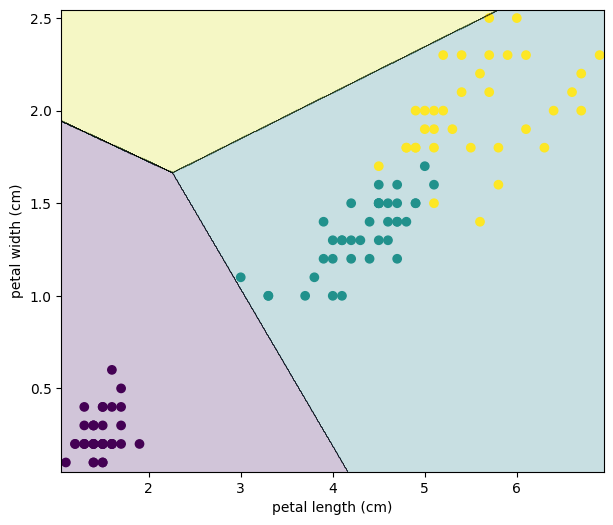

In [8]:
#TODO
clf1 = LinearSVC(loss = 'hinge',C=0.01)
clf1.fit(X_train,y_train)
plot_decision_boundary(clf1, X_train,y_train)

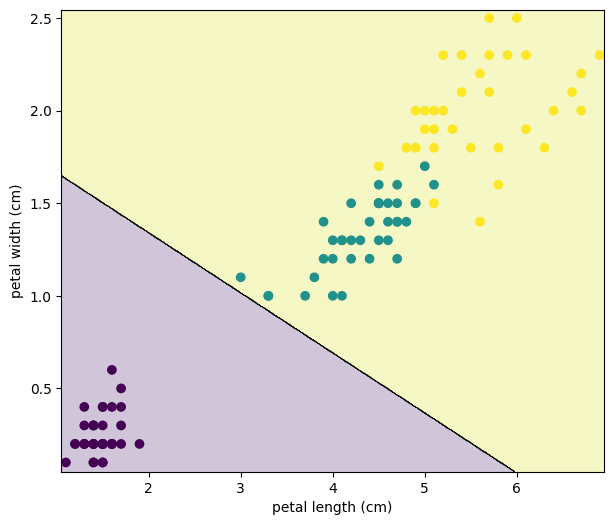

In [9]:
clf2 = LinearSVC(loss = 'hinge',C=0.1)
clf2.fit(X_train,y_train)
plot_decision_boundary(clf2, X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


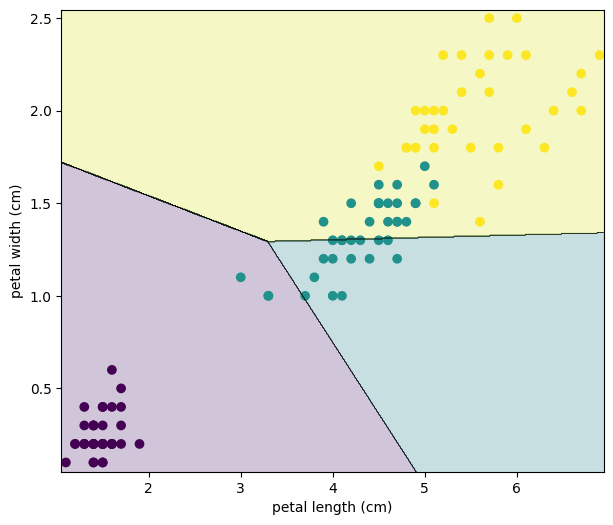

In [10]:
clf3 = LinearSVC(loss = 'hinge',C=1.0)
clf3.fit(X_train,y_train)
plot_decision_boundary(clf3,X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


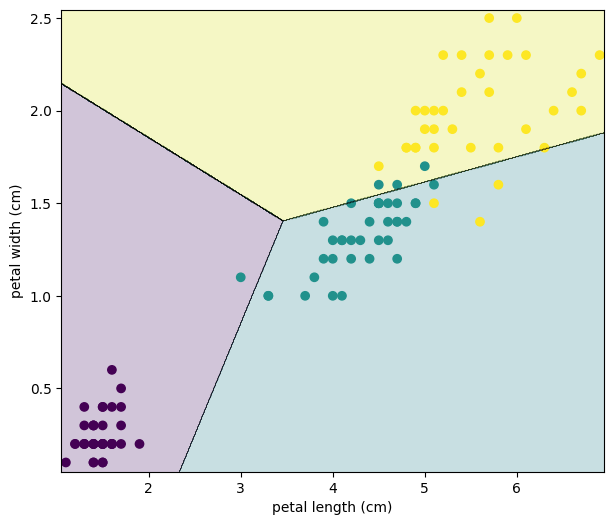

In [11]:
clf4 = LinearSVC(loss = 'hinge',C=10.0)
clf4.fit(X_train,y_train)
plot_decision_boundary(clf4, X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


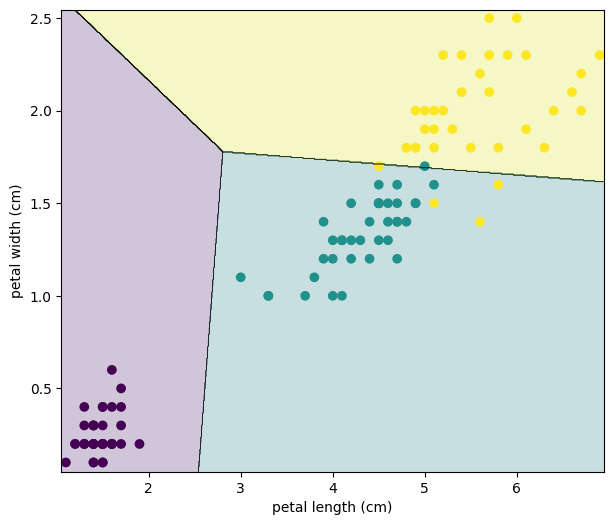

In [12]:
clf5 = LinearSVC(loss = 'hinge',C=100.0)
clf5.fit(X_train,y_train)
plot_decision_boundary(clf5, X_train,y_train)

Answer:C มีผลต่ออาณาเขตพื้นที่การแบ่งกลุ่ม

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [13]:
#TODO
from sklearn.metrics import classification_report

clf5.fit(X_train, y_train)
ypred = clf5.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      0.91      0.91        11
           2       0.93      0.93      0.93        15

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

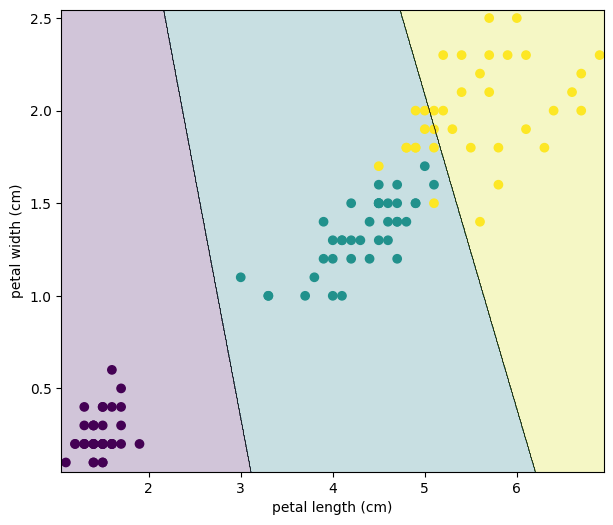

In [14]:
#TODO
clf6 = SVC(kernel='rbf',C=1.0 ,  gamma = 0.01)
clf6.fit(X_train,y_train)
plot_decision_boundary(clf6, X_train,y_train)

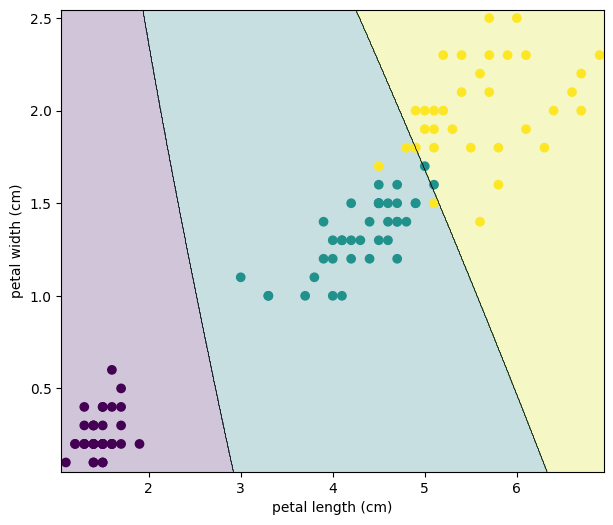

In [15]:
clf7 = SVC(kernel='rbf',C=1.0 ,  gamma = 0.1)
clf7.fit(X_train,y_train)
plot_decision_boundary(clf7,X_train,y_train)

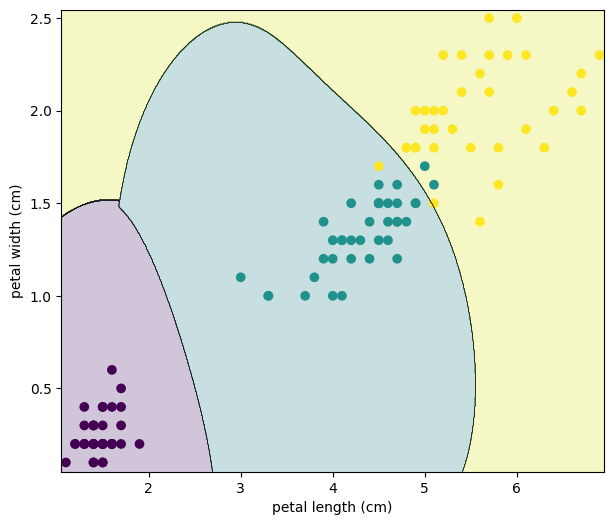

In [16]:
clf8 = SVC(kernel='rbf',C=1.0 ,  gamma = 1.0)
clf8.fit(X_train,y_train)
plot_decision_boundary(clf8,X_train,y_train)

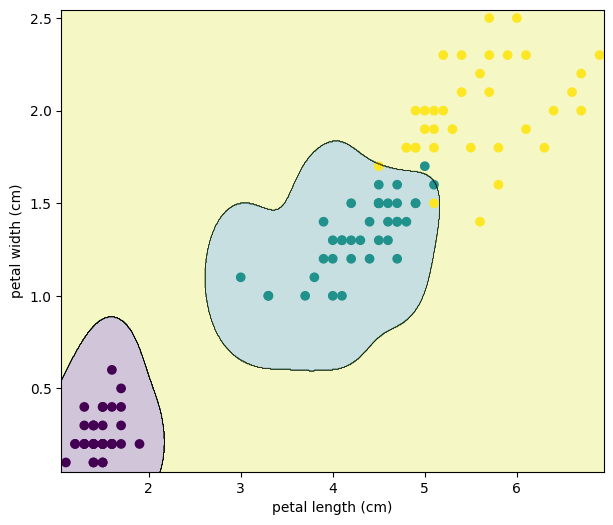

In [17]:
clf9 = SVC(kernel='rbf',C=1.0 ,  gamma = 10.0)
clf9.fit(X_train,y_train)
plot_decision_boundary(clf9,X_train,y_train)

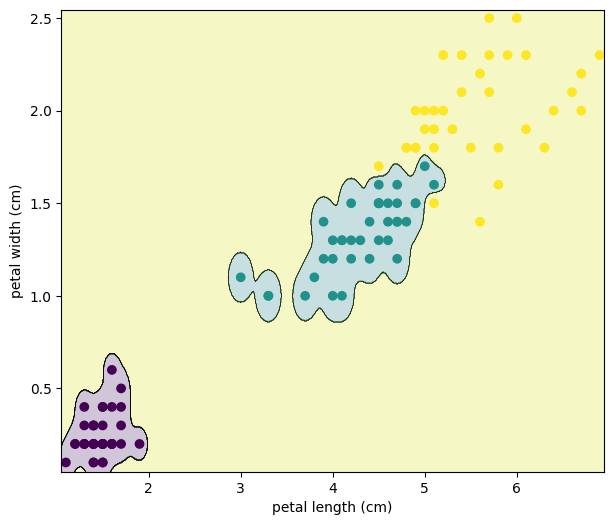

In [18]:
clf10 = SVC(kernel='rbf',C=1.0 ,  gamma = 100.0)
clf10.fit(X_train,y_train)
plot_decision_boundary(clf10, X_train,y_train)

Answer = gamma มีผลต่ออาณาเขตพื้นที่การแบ่งกลุ่ม และแบ่งกลุ่มได้จัดเจนมากขึ้น

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [21]:
#TODO
from sklearn.metrics import classification_report

clf10.fit(X_train, y_train)
ypred = clf10.predict(X_test)
clf10.support_
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.88      0.64      0.74        11
           2       0.70      0.93      0.80        15

    accuracy                           0.82        38
   macro avg       0.86      0.80      0.82        38
weighted avg       0.85      0.82      0.82        38



In [22]:
clf10.support_ # supportตัวที่1 อยู่แถวที่4

array([ 18,  32,  43,  54,  68,  73,  74,  78,  81,  82,  84,  85,  86,
        93,  95, 101, 102, 103, 105, 110, 111,   0,   2,   6,   7,   9,
        24,  29,  40,  49,  50,  51,  52,  57,  58,  59,  62,  64,  65,
        71,  75,  79,  80,  89,  90,  91,  92,  94,  96,  97,  98,  99,
       106, 109,   3,   8,  12,  14,  15,  19,  23,  28,  33,  34,  36,
        37,  44,  45,  46,  47,  48,  53,  55,  56,  60,  61,  63,  66,
        67,  69,  72,  77,  87,  88, 100, 104, 107, 108], dtype=int32)

1-0.82 = 0.18 หมายความว่าถ้า Model มี 100 ตัว Model จะทำนายผิดไป 18 ตัว

support vector มี 87 ตัว

#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

Answer: Linear SVM เหมาะสมกับการแบ่งข้อมูลชุดนี้มากกว่า เนื่องจาก test accuracy ดีกว่า